In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


***Linear Regression***

In [56]:
data=pd.read_csv("car_age_price_e8b1463b487c14084ccfcb82d4c22d7c.csv")

In [57]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [58]:
#Y is 'Price'(target or dependant variable)as we have to predict y
#X is Year(Feature)
y=data['Price']
x=data.drop('Price',axis=1)

In [59]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [60]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


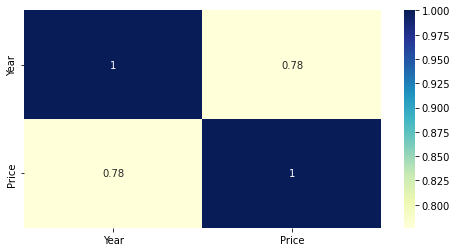

In [61]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [62]:
#performing train test
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [63]:
#performing linear regression
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [64]:
#Fitting training values in the model
model=l.fit(x_train,y_train)
#predicting values for xtest
predictions=model.predict(x_test)

In [65]:
#creating evaluation matrix for comparing actual y test and predicted value
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
print("Mean squared error is",mean_squared_error(y_test,predictions))
print("R square value is",r2_score(y_test,predictions))

Mean squared error is 4326906256.829671
R square value is 0.36759313425902185


In [41]:
#predicting price for the year 2022
B = np.reshape(2022, (1, 1))

In [42]:
B

array([[2022]])

In [43]:
predict=model.predict(B)
predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([743601.61594504])

In [ ]:
#Price prediction for 2022 is 743601.61594504

***Lasso Regression***

In [67]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [68]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [69]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [88]:
#Splitting data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
#Importing lasso
from sklearn.linear_model import Lasso

In [90]:
#Creating instance
lasso=Lasso(alpha=1)
#Fitting training data into model
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [91]:
#Predicting using xtest values
predictions1=lasso.predict(x_test)

In [92]:
predictions1

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [93]:
from sklearn.metrics import mean_squared_error,r2_score

In [94]:
print("Mean squared error is",mean_squared_error(y_test,predictions1))

Mean squared error is 4326859771.015669


In [98]:
lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"]=x_train.columns
lasso_coeff['Coefficiemt Estimate']=pd.Series(lasso.coef_)
print(lasso_coeff)

  Columns  Coefficiemt Estimate
0    Year            47608.1556


In [ ]:
# Mean squared error is 4326906256.829671 for Linear Rregression
# Mean squared error is 4326859771.015669 for Lasso regression model
#So both are performing almost same.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


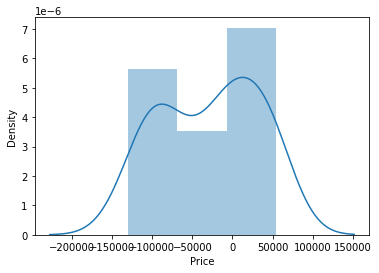

In [95]:
sns.distplot(y_test-predictions1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


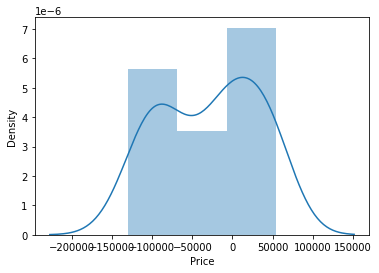

In [96]:
sns.distplot(y_test-predictions)